### One major thing is that when there is no normal distribution and there is no skewed distribution we can use Percentile method for outlier detection

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv(r"C:\Users\jayes\Downloads\weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [28]:
df.shape

(10000, 3)

#### Percentiles are a measure that indicates a specific value below which a given percentage of observations fall. For instance, the 25th percentile (Q1) indicates the value below which 25% of the data points lie. By utilizing percentiles, we can establish thresholds that define what values are considered normal and what are potential outliers.

##### Advantages of Percentile-Based Outlier Removal:

Robustness: Percentile-based outlier removal is less sensitive to extreme values, making it suitable for skewed or non-normal distribution
s.
Flexibility: By adjusting the percentile thresholds, you can control the strictness of outlier removal to match the characteristics of your data.

In [29]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\jayes\AppData\Local\Temp\ipykernel_15712\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

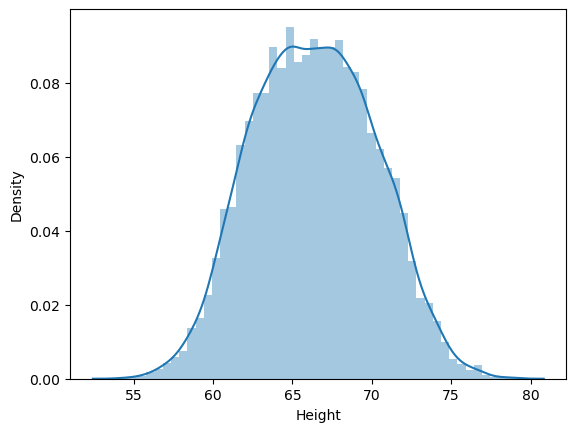

In [30]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

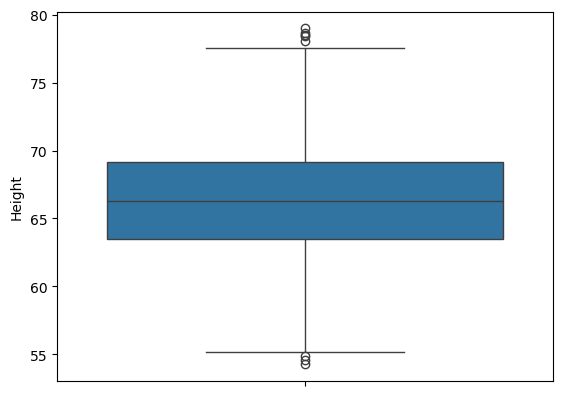

In [31]:
sns.boxplot(df['Height'])

In [32]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [33]:
min_limit=df['Height'].quantile(0.01)
max_limit=df['Height'].quantile(0.99)

In [34]:
min_limit

58.13441158671655

In [35]:
max_limit

74.7857900583366

In [36]:
df[( df['Height']>max_limit) | (df['Height']<min_limit) ]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [37]:
df1=df[( df['Height']<max_limit) & (df['Height']>min_limit) ]

In [38]:
df1.shape

(9800, 3)

<Axes: ylabel='Height'>

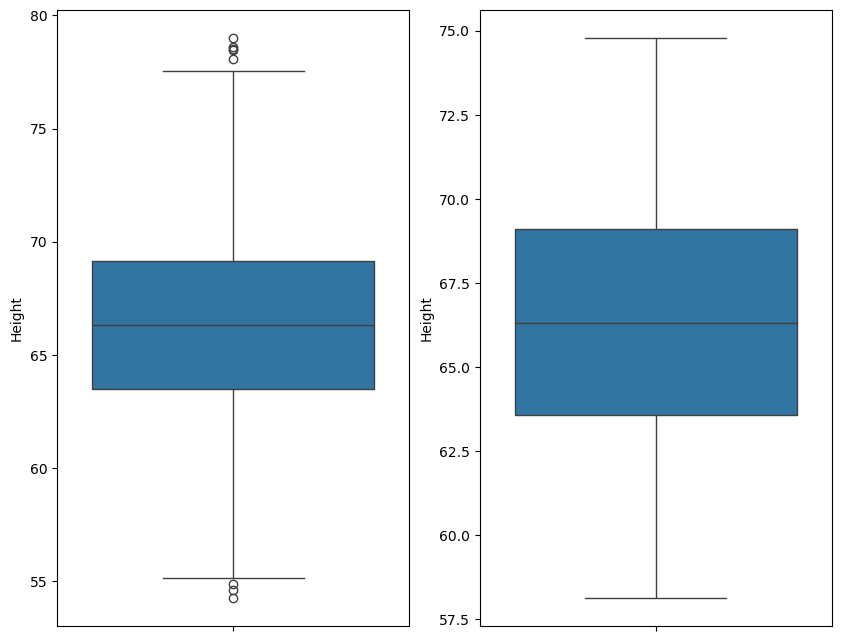

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])
plt.subplot(1,2,2)
sns.boxplot(df1['Height'])
plt.show()

# Capping

In [40]:
df2=df.copy()

In [41]:
df2['Height']= np.where(df2['Height']>max_limit ,max_limit,
                       np.where(df2['Height']<min_limit,min_limit,df2['Height']) )

In [42]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


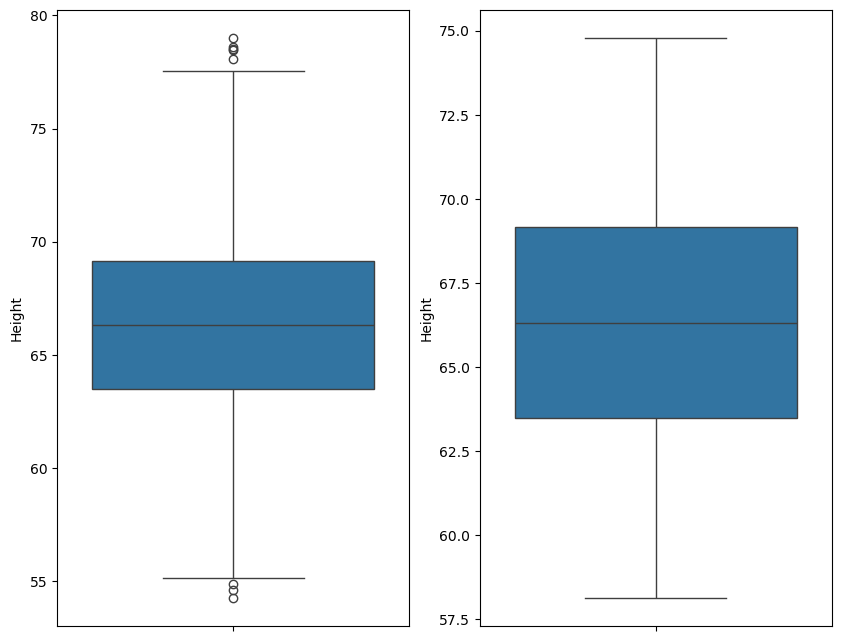

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])
plt.subplot(1,2,2)
sns.boxplot(df2['Height'])
plt.show()